<a href="https://colab.research.google.com/github/FrancescoCortopassi/copilot-codespaces-vscode/blob/main/LEZIONE_59_to_62.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LEZIONE_59: INTRODUCTION
Si descrive lo scopo di queste lezioni, ovvero esercitarsi nello sviluppo di una stregia di crossover tra EMA_S ed SMA_L, andando poi a backtestare i risultati

In [1]:
#STEP_1: IMPORTARE LE LIBRERIE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
pct=0.0007

In [7]:
#STEP_2: IMPORTARE IL DATAFRAME
data=pd.read_csv("/content/eurusd.csv",sep=",",header=0,index_col=0,parse_dates=True)
data

,price
Date,
2004-01-01,1.258194
2004-01-02,1.258194
2004-01-05,1.268698
2004-01-06,1.272103
2004-01-07,1.264095
...,...
2020-06-24,1.131235
2020-06-25,1.125087
2020-06-26,1.122208


In [15]:
#STEP_3: Sviluppiamo le colonne con gli indicatori
data["EMA_S"]=data["price"].ewm(span=10).mean()
data["SMA_L"]=data["price"].rolling(window=50).mean()
data

,price,EMA_S,EMA_L,SMA_L
Date,,,,
2004-01-01,1.258194,1.258194,1.258194,NaN
2004-01-02,1.258194,1.258194,1.258194,NaN
2004-01-05,1.268698,1.262416,1.258606,NaN
2004-01-06,1.272103,1.265608,1.259135,NaN
2004-01-07,1.264095,1.265173,1.259330,NaN
...,...,...,...,...
2020-06-24,1.131235,1.125844,1.109674,1.101794
2020-06-25,1.125087,1.125706,1.110279,1.102486
2020-06-26,1.122208,1.125070,1.110746,1.103213


In [16]:
#STEP_4:DEFINIAMO LA POSITION
data["position"]=np.where(data["EMA_S"]>data["SMA_L"],1,-1)
data

,price,EMA_S,EMA_L,SMA_L,position
Date,,,,,
2004-01-01,1.258194,1.258194,1.258194,NaN,-1
2004-01-02,1.258194,1.258194,1.258194,NaN,-1
2004-01-05,1.268698,1.262416,1.258606,NaN,-1
2004-01-06,1.272103,1.265608,1.259135,NaN,-1
2004-01-07,1.264095,1.265173,1.259330,NaN,-1
...,...,...,...,...,...
2020-06-24,1.131235,1.125844,1.109674,1.101794,1
2020-06-25,1.125087,1.125706,1.110279,1.102486,1
2020-06-26,1.122208,1.125070,1.110746,1.103213,1


In [20]:
#STEP_5: DEFINIAMO LA STRATEGY
data["strategy"]=data["position"].shift(1)*data["price"].pct_change()
data

,price,EMA_S,EMA_L,SMA_L,position,strategy
Date,,,,,,
2004-01-01,1.258194,1.258194,1.258194,NaN,-1,NaN
2004-01-02,1.258194,1.258194,1.258194,NaN,-1,-0.000000
2004-01-05,1.268698,1.262416,1.258606,NaN,-1,-0.008348
2004-01-06,1.272103,1.265608,1.259135,NaN,-1,-0.002684
2004-01-07,1.264095,1.265173,1.259330,NaN,-1,0.006295
...,...,...,...,...,...,...
2020-06-24,1.131235,1.125844,1.109674,1.101794,1,0.002896
2020-06-25,1.125087,1.125706,1.110279,1.102486,1,-0.005434
2020-06-26,1.122208,1.125070,1.110746,1.103213,1,-0.002559


In [23]:
#STEP_6: DEFINIAMO I RETURNS
data["returns"]=np.log(data["price"])/data["price"].shift(1)
data

,price,EMA_S,EMA_L,SMA_L,position,strategy,returns
Date,,,,,,,
2004-01-01,1.258194,1.258194,1.258194,NaN,-1,NaN,NaN
2004-01-02,1.258194,1.258194,1.258194,NaN,-1,-0.000000,0.182545
2004-01-05,1.268698,1.262416,1.258606,NaN,-1,-0.008348,0.189153
2004-01-06,1.272103,1.265608,1.259135,NaN,-1,-0.002684,0.189700
2004-01-07,1.264095,1.265173,1.259330,NaN,-1,0.006295,0.184227
...,...,...,...,...,...,...,...
2020-06-24,1.131235,1.125844,1.109674,1.101794,1,0.002896,0.109320
2020-06-25,1.125087,1.125706,1.110279,1.102486,1,-0.005434,0.104188
2020-06-26,1.122208,1.125070,1.110746,1.103213,1,-0.002559,0.102480


<Axes: title={'center': 'EURUSD'}, xlabel='Date'>

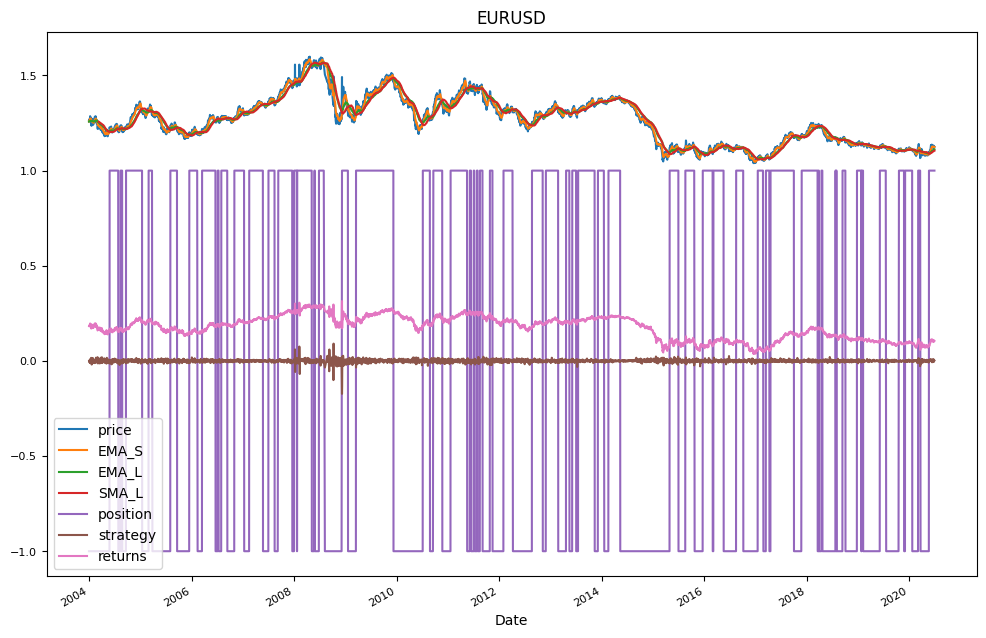

In [25]:
data.plot(figsize=(12,8),title="EURUSD",fontsize=8)

In [27]:
#STEP_6: CALCOLIAMO I RITORNI CUMULATIVI
data["creturns"]=data["returns"].cumsum().apply(np.exp)
data["cstrategy"]=data["strategy"].cumsum().apply(np.exp)
data.dropna(inplace=True)
data

,price,EMA_S,EMA_L,SMA_L,position,strategy,returns,creturns,cstrategy
Date,,,,,,,,,
2004-03-10,1.223197,1.235677,1.252880,1.257291,-1,0.007070,0.163541,7.401483e+03,1.026740
2004-03-11,1.235102,1.235572,1.252183,1.256829,-1,-0.009733,0.172624,8.796065e+03,1.016795
2004-03-12,1.222404,1.233178,1.251015,1.256113,-1,0.010280,0.162594,1.034908e+04,1.027302
2004-03-15,1.227205,1.232092,1.250082,1.255283,-1,-0.003927,0.167489,1.223605e+04,1.023276
2004-03-16,1.226106,1.231004,1.249141,1.254363,-1,0.000895,0.166104,1.444706e+04,1.024192
...,...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,1.125844,1.109674,1.101794,1,0.002896,0.109320,inf,0.842116
2020-06-25,1.125087,1.125706,1.110279,1.102486,1,-0.005434,0.104188,inf,0.837552
2020-06-26,1.122208,1.125070,1.110746,1.103213,1,-0.002559,0.102480,inf,0.835412


In [31]:
data(["creturns","cstrategy"]).plot(figsize=(12,8),title="EURUSD",fontsize=8)